In [98]:
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_percentage_error,
    mean_absolute_error,
)

In [67]:
def fit_and_validate_model(
    model: Union[LinearRegression, SVR, GradientBoostingRegressor],
    train_X: np.ndarray,
    train_y: np.ndarray,
    val_X: np.ndarray,
    val_y: np.ndarray,
) -> Union[LinearRegression, SVR, GradientBoostingRegressor]:
    model = model.fit(train_X, train_y)
    val_preds = model.predict(val_X)
    r2 = r2_score(val_y, val_preds)
    mape = mean_absolute_percentage_error(val_y, val_preds)
    mse = mean_squared_error(val_y, val_preds)
    mae = mean_absolute_error(val_y, val_preds)
    print(f"Validation R2 score: {r2}")
    print(f"MAPE: {mape}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    return model, {"r2": r2, "mape": mape, "mae": mae, "mse": mse}


def get_test_score(
    model: Union[LinearRegression, SVR, GradientBoostingRegressor],
    X: np.ndarray,
    y: np.ndarray,
) -> None:
    print(f"Validation R2 score: {r2_score(y, model.predict(X))}")
    print(f"MSE: {mean_squared_error(y, model.predict(X))}")
    return None

In [59]:
train_data = pd.read_csv("../data/processed/train.csv")
val_data = pd.read_csv("../data/processed/val.csv")

In [60]:
train_X, train_y = train_data.drop("pt_loss", axis=1), train_data["pt_loss"]
val_X, val_y = val_data.drop("pt_loss", axis=1), val_data["pt_loss"]

In [68]:
lin_reg, lin_reg_metrics = fit_and_validate_model(
    LinearRegression(), train_X.values, train_y.values, val_X.values, val_y.values
)

Validation R2 score: 0.77394146027741
MAPE: 0.31074170433898785
MAE: 0.044469729794013084
MSE: 0.003631635883167579


In [80]:
svm_rbf_kernel, svm_rbf_kernel_metrics = fit_and_validate_model(
    SVR(kernel="rbf"), train_X.values, train_y.values, val_X.values, val_y.values
)

Validation R2 score: 0.020524356783038655
MAPE: 0.8419476109451042
MAE: 0.10497322980449524
MSE: 0.015735299789870757


In [99]:
rand_forest, rand_forest_metrics = fit_and_validate_model(
    RandomForestRegressor(),
    train_X.values,
    train_y.values,
    val_X.values,
    val_y.values,
)

Validation R2 score: 0.8947222480613645
MAPE: 0.06948338556415487
MAE: 0.013283138461538445
MSE: 0.0016912896195328186


In [82]:
grad_boost_reg, grad_boost_reg_metrics = fit_and_validate_model(
    GradientBoostingRegressor(),
    train_X.values,
    train_y.values,
    val_X.values,
    val_y.values,
)

Validation R2 score: 0.9318521701624484
MAPE: 0.12248701524236072
MAE: 0.018275810926879882
MSE: 0.0010947965270489588


Придумаем визуализацию

In [96]:
def visualize_residuals(
    model: Union[LinearRegression, SVR, GradientBoostingRegressor],
    val_X: np.ndarray,
    val_y: np.ndarray,
) -> None:
    val_preds = model.predict(val_X)
    residuals = val_y - val_preds
    plt.figure(figsize=(4, 4))
    plt.title("Residuals")
    plt.hist(residuals, bins=len(val_y) // 10)
    plt.show()
    return None


def visualize_pairplot(
    model: Union[LinearRegression, SVR, GradientBoostingRegressor],
    val_X: np.ndarray,
    val_y: np.ndarray,
) -> None:
    val_preds = model.predict(val_X)
    plt.figure(figsize=(4, 4))
    plt.title("Pair plot")
    plt.scatter(val_preds, val_y)
    plt.ylabel("Predictions")
    plt.xlabel("Ground Truth's")
    plt.show()
    return None


def visualize_metrics(
    scores: list[float], labels: list[str], metric_name: str
) -> None:
    plt.figure(figsize=(6, 3))
    plt.title(f"{metric_name} values")
    plt.bar_label(
        plt.bar(labels, scores),
        [round(score, 3) for score in scores],
        label_type="center",
        c='white'
    )
    plt.xlabel("Model")
    plt.ylabel("Metric value")
    plt.show()
    return None

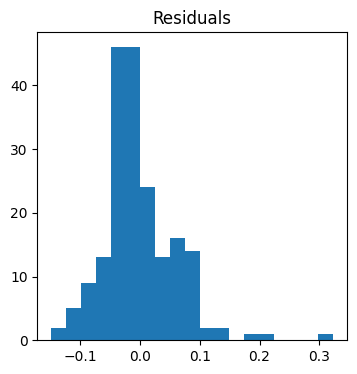

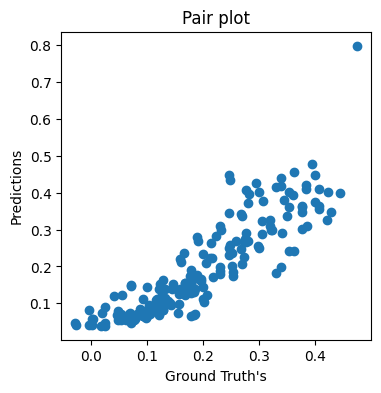

In [50]:
visualize_residuals(lin_reg, val_X.values, val_y.values)
visualize_pairplot(lin_reg, val_X.values, val_y.values)

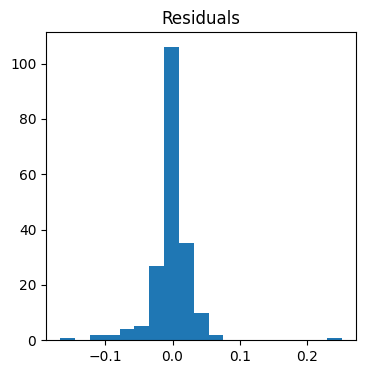

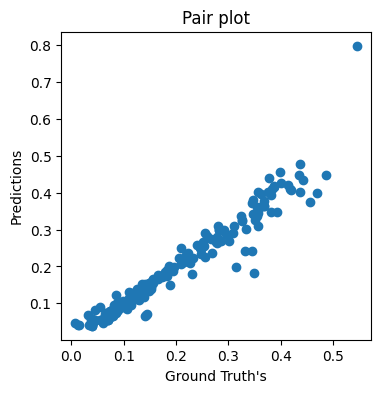

In [51]:
visualize_residuals(grad_boost_reg, val_X.values, val_y.values)
visualize_pairplot(grad_boost_reg, val_X.values, val_y.values)

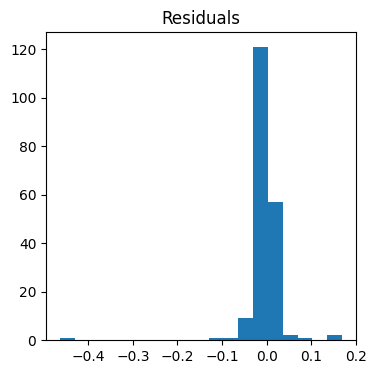

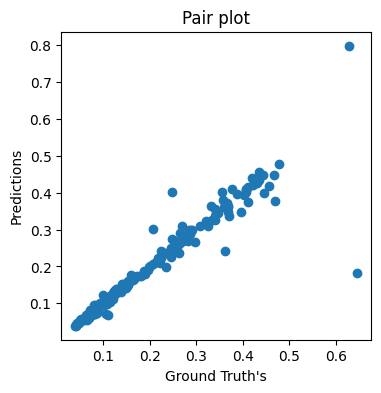

In [101]:
visualize_residuals(rand_forest, val_X.values, val_y.values)
visualize_pairplot(rand_forest, val_X.values, val_y.values)

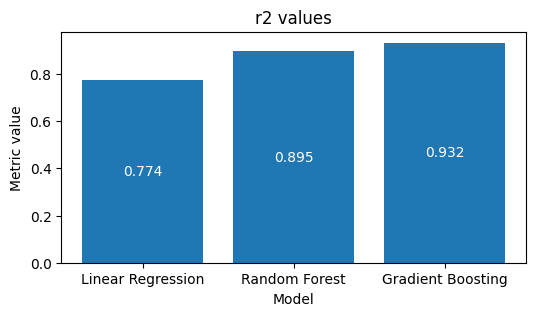

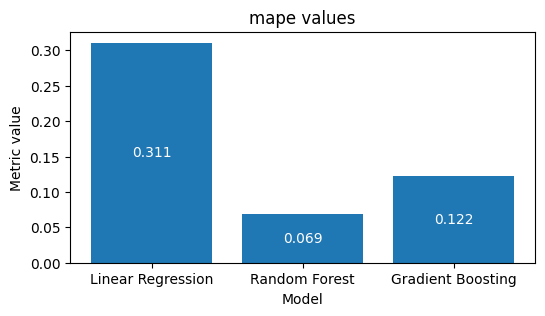

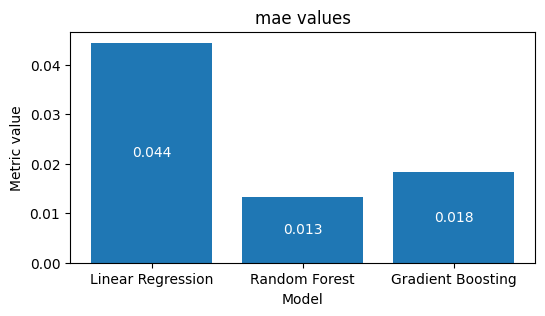

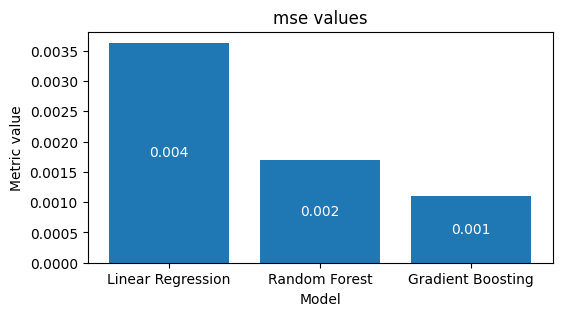

In [100]:
for key in lin_reg_metrics.keys():
    visualize_metrics(
        [metric_dict.get(key) for metric_dict in [lin_reg_metrics, rand_forest_metrics, grad_boost_reg_metrics]],
        ["Linear Regression", "Random Forest", "Gradient Boosting"],
        key
    )